In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [112]:
#훈련파일 불러오기
file_path_1 = './train.csv'
df_train = pd.read_csv(file_path_1)
print(df_train)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [113]:
file_path_2 = './test.csv'
df_test = pd.read_csv(file_path_2)
print(df_test)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [114]:
#인덱스를 라벨로 변경
df_train.set_index('label',inplace=True)
print(df_train)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
label                                                                           
1           0       0       0       0       0       0       0       0       0   
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
0           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
7           0       0       0       0       0       0       0       0       0   
6           0       0       0       0       0       0       0       0       0   
9           0       0       

In [115]:
np_train = df_train.to_numpy()

In [116]:
np_train = np_train.reshape(42000, 28, 28)

In [117]:
np_train.shape

(42000, 28, 28)

In [118]:
np_test = df_test.to_numpy()

In [119]:
np_test = np_test.reshape(28000, 28, 28)

In [120]:
np_train = np_train / 255

In [137]:
np_test = np_test / 255

In [122]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # 각각의 확률을 출력
])

In [123]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(np_train, df_train.index, epochs = 5)

Epoch 1/5
1313/1313 [==============================] - 23s 18ms/step - loss: 0.2433 - accuracy: 0.9261: 22s - loss: 0.961 - ETA: 22s - loss: 0.6943 - accuracy: - ETA: 22s - loss: 0.6465 - accur - ETA: 22s - loss: 0.5902 - accuracy: 0.821 - ETA: 22s - loss: 0.5866 - accuracy: 0 - ETA: 21s - loss: 0.5702 -  - ETA: 20s - loss: 0. - ETA: 17s -  - ETA: 13s - loss: 0.3746 - accuracy: 0. - ETA: 13s - loss: 0.3704 - accuracy: 0.8 - ETA: 13s - loss: 0.3675 - accura - ETA: 12s - loss: 0.3531 - accuracy: 0 - ETA: 12s - loss: 0.3469 - accuracy - ETA: 11s - loss: 0.3388 - accur - ETA: 10s - loss: 0.3271 - ETA: 9s - loss: 0.3065 - accuracy:  - ETA: 5s - l - ETA: 2s - loss: 0.2545 - accu - ETA: 1s - loss: 0.2520 - accuracy: 0.92 - ETA: 1s - loss: 0.2515 - accu
Epoch 2/5
1313/1313 [==============================] - 21s 16ms/step - loss: 0.0964 - accuracy: 0.9695: 21s - loss: 0.1137 - accuracy: 0.9 - ETA: 22s - loss: 0.10 - ETA: 20s - loss: 0.1080 - accur - ETA: 14s - loss: 0.1049 - accuracy: 0. - ETA:

In [138]:
print(model.predict(np_test[26543].reshape(1,28,28)))

[[1.4527005e-06 3.8297750e-07 2.7116243e-08 3.5571976e-08 1.2078387e-07
  8.3844781e-05 9.9882096e-01 1.1182182e-09 1.0931798e-03 3.6674841e-08]]


In [139]:
print(np.argmax(model.predict(np_test[26543].reshape(1,28,28))))

6


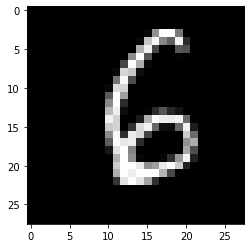

In [136]:
plt.imshow(np_test[26543], cmap = 'gray')
plt.show()